# IMPORT LIB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick
from ydata_profiling import ProfileReport
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import sidetable as stb
from sklearn.metrics import roc_auc_score, roc_curve
pd.options.display.max_columns = None

# LOAD DATA

In [2]:
hotel_demand_path='/Users/admin/Documents/PYTHON CLASS/Final-test/hotel_bookings.csv'

In [3]:
#Create Function to Load Data
def load_data(path: str) -> pd.DataFrame:
  '''
  This function is to load data from dist
  Args: 
    path: location where your data is located
  Return:
    pandas dataframe: this is full version of the file
  '''
  df_function = pd.read_csv(path)
  return df_function  

#Create Function to Create Header 
def create_header(df, header_list):
  '''
  Create a new header for a Pandas DataFrame using a list of column names.
    
  Parameters:
    df (Pandas DataFrame): The DataFrame to create a header for.
    header_list (list): A list of column names to use as the header.
    
  Returns:
    The updated DataFrame with the new header.
  '''
  # Set the column names to the values in header_list
  df.columns = header_list
    
  return df

In [4]:
#Load Data 
data=load_data(hotel_demand_path)

# EDA

In [5]:
## Copy the dataset
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.shape 

(119390, 32)

In [8]:
display(df.head(5))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
## missing values detection
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [10]:
def check_unique_values(df):
  for col in df.columns:
    print(f'{col}:{df[col].unique()}')

In [11]:
check_unique_values(df)

hotel:['Resort Hotel' 'City Hotel']
is_canceled:[0 1]
lead_time:[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

Xử lý missing value:

- Đối với company và agent:
Tỷ lệ missing value cột company lên tới 94 % và cột agent là 13 % vì vậy nên ta drop 2 cột này. 

- Đối với country:
Cột country tỷ lệ missing value là 0,4% và là kiểu dữ liệu categorical nên ta xử lý bằng cách lấy dữ liệu được xuất hiện nhiều nhất (mode) fill cho các dữ liệu bị thiếu. 

- Đối với children:
Cột children tỷ lệ missing value là 0,003% là kiểu dữ liệu numberic nên ta xử lý bằng cách lấy mean của cột fill cho các dữ liệu bị thiếu.

In [12]:
#Create function to drop columns
def drop_not_used_columns(df, columns_to_drop):
  df.drop(columns_to_drop,axis=1, inplace=True)
  return df

In [13]:
df=drop_not_used_columns(df,['company','agent'])

In [14]:
#Create function to fill missing data

def fill_missing_data(data, column_name, method='mode'):
    """
    Fill missing values in a specific column with either the mode or mean value.

    Args:
        data (pandas.DataFrame): The dataset containing the column with missing values.
        column_name (str): The name of the column to be filled.
        method (str, optional): The method to fill missing values. Options: 'mode' or 'mean'. Defaults to 'mode'.

    Returns:
        pandas.DataFrame: The dataset with missing values filled.
    """
    filled_data = data.copy()  # Create a copy of the original dataset
    
    if method == 'mode':
        fill_value = data[column_name].mode()[0]  # Compute the mode of the column
    elif method == 'mean':
        fill_value = data[column_name].mean()  # Compute the mean of the column
    else:
        raise ValueError("Invalid method. Choose either 'mode' or 'mean'.")
    
    filled_data[column_name].fillna(fill_value, inplace=True)  # Fill missing values with the chosen value
    
    return filled_data


In [15]:
df=fill_missing_data(df,'country', method='mode')
df=fill_missing_data(df,'children', method='mean')


In [16]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [17]:
df[['children']] = df[['children']].astype('int64')

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


Xử lý outliner: 
1. Check outliner 
2. Dựa trên plot loại bỏ outliner

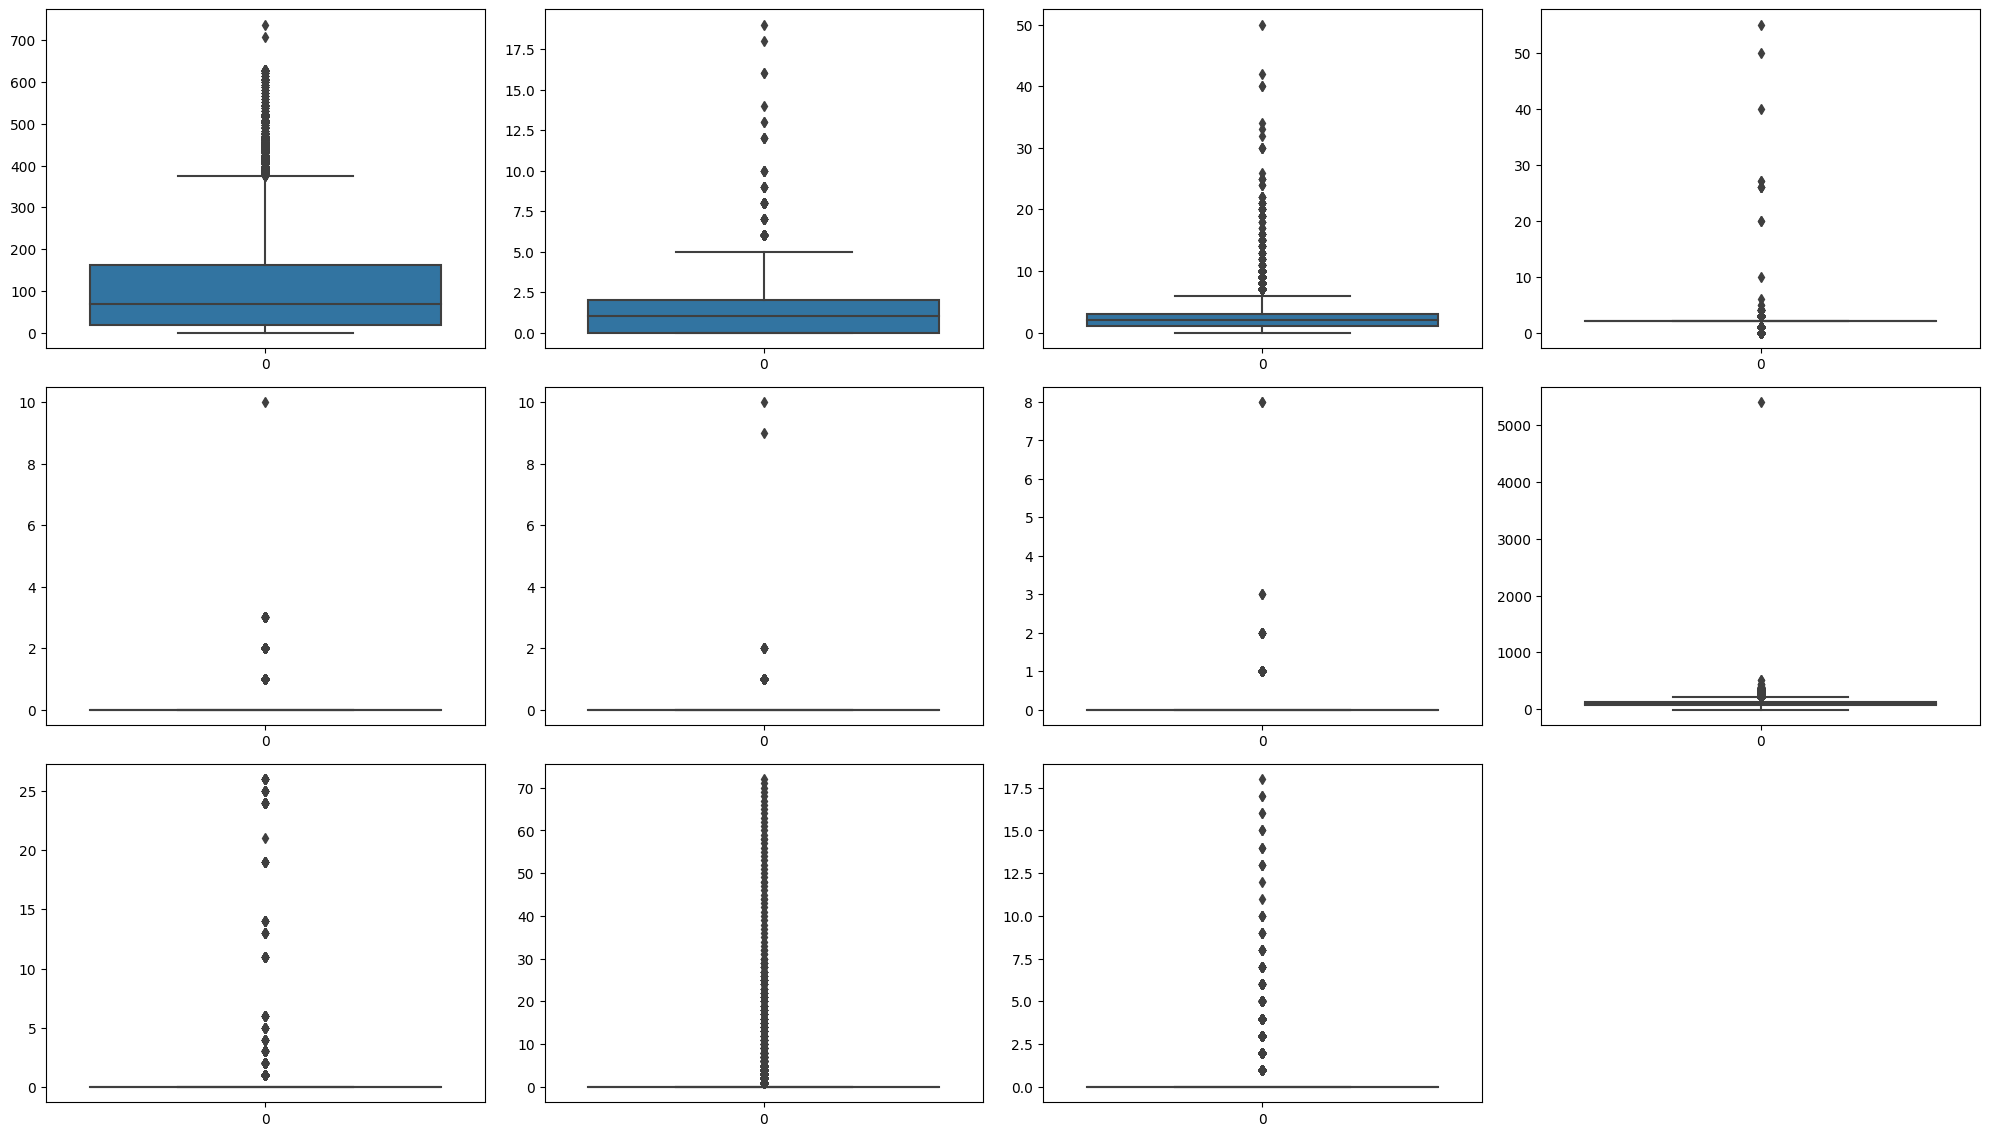

In [19]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

In [20]:
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

In [21]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


# CREATE MASTER SET TO TRAIN

In [22]:
#Create new feature 
## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df['net_cancelled'] = 0
df.loc[ df['previous_cancellations'] > df['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [23]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [24]:
x, y = get_count(df['country'], limit=10)
country_names = {code: pc.countries.get(alpha_3=code).name for code in x}
df['country_name'] = df['country'].map(country_names)

In [25]:
df['Room'] = 0
df.loc[ df['reserved_room_type'] == df['assigned_room_type'] , 'Room'] = 1

In [26]:
# Define a function to apply the grouping condition
# PRT: 1
# Other: 0
def group_condition(value):
    if value == "PRT":
        return '1'
    else:
        return '0'

# Create a new column 'NewGroup' with the grouped values
df['group_country'] = df['country'].apply(group_condition)

print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        500               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [27]:
df['hotel_encoded'] = df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})

In [28]:
#splitting the "reservation_status_date" column to three columns year, month and day
#df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
#df['year'] = df['reservation_status_date'].dt.year
#df['month'] = df['reservation_status_date'].dt.month
#df['day'] = df['reservation_status_date'].dt.day 

In [29]:
#df['year'] = df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [30]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,net_cancelled,country_name,Room,group_country,hotel_encoded
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,Portugal,1,1,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,Portugal,1,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,United Kingdom,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,United Kingdom,1,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,United Kingdom,1,0,0


In [31]:
import dython
from dython.nominal import associations

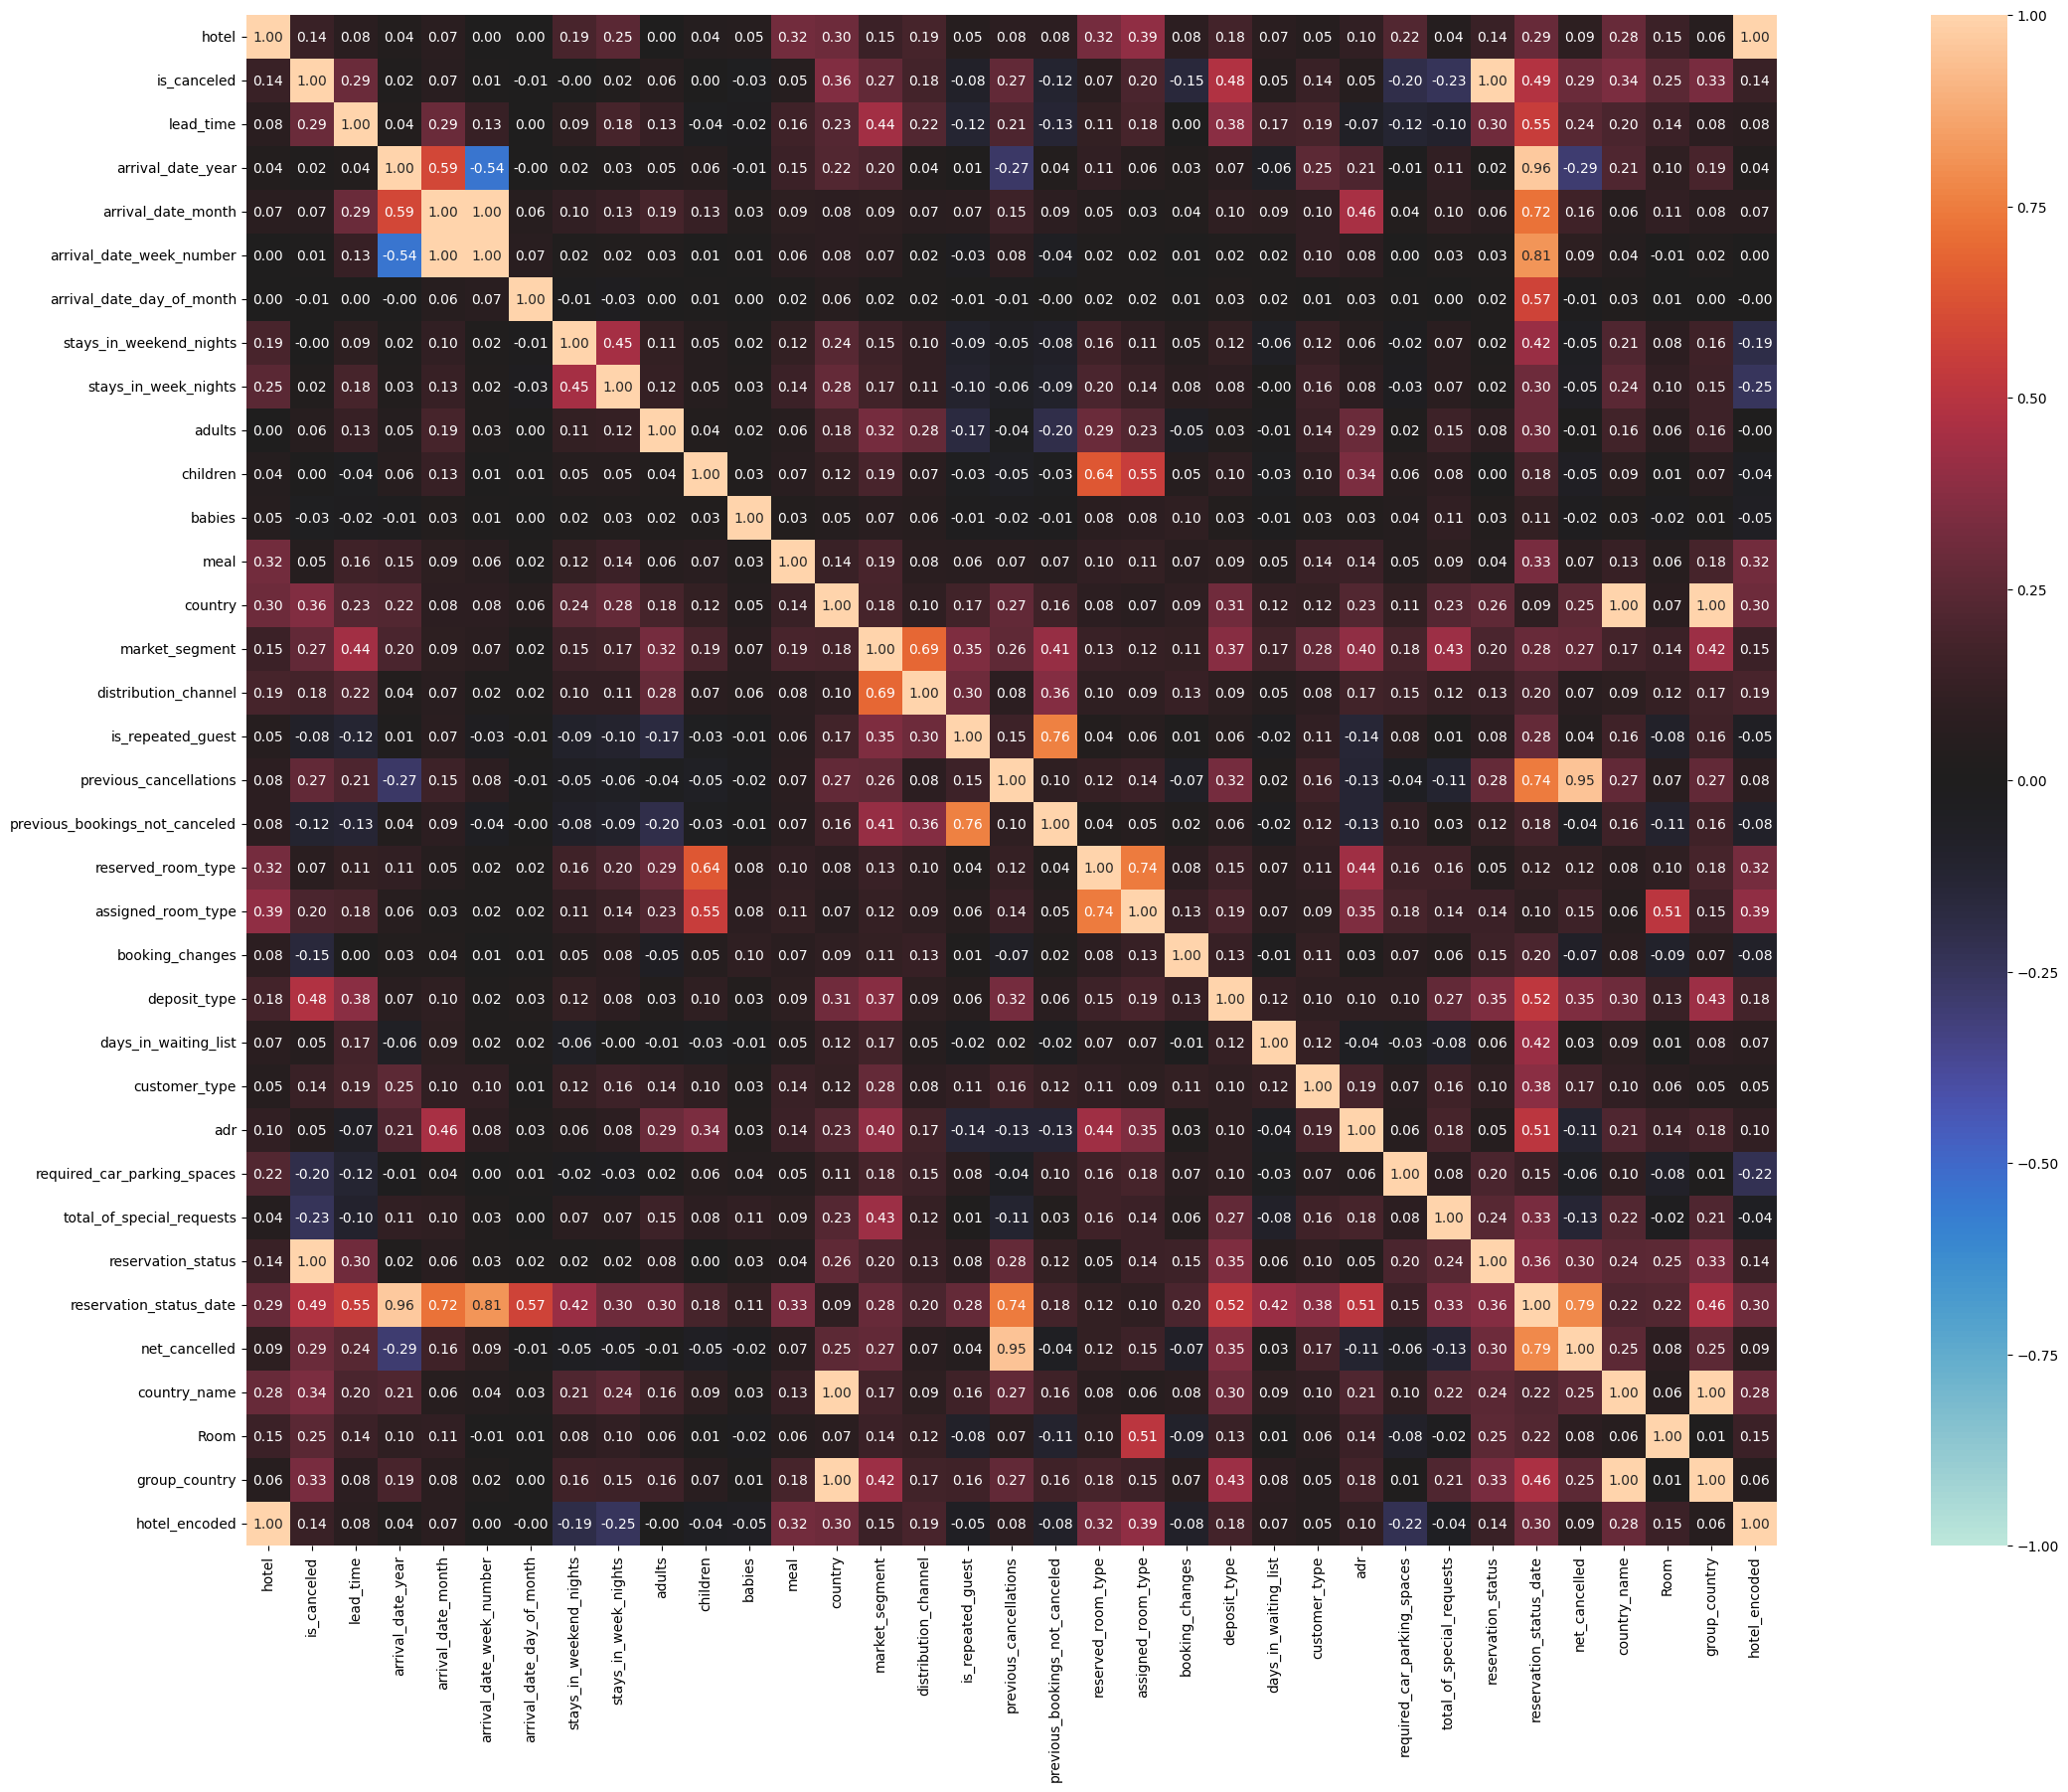

In [32]:
associations(df, figsize = (40, 20))
plt.show()

In [33]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

/var/folders/st/55mr4q7x2l58fzwrl4b1c8x80000gn/T/ipykernel_3090/599440065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)


is_canceled                       1.000000
net_cancelled                     0.293529
lead_time                         0.292988
previous_cancellations            0.271021
Room                              0.246768
total_of_special_requests         0.234877
required_car_parking_spaces       0.197019
booking_changes                   0.152321
hotel_encoded                     0.137082
previous_bookings_not_canceled    0.115446
is_repeated_guest                 0.083745
adults                            0.061615
days_in_waiting_list              0.054301
adr                               0.047735
babies                            0.034155
stays_in_week_nights              0.023527
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004588
stays_in_weekend_nights           0.002616
Name: is_canceled, dtype: float64

In [34]:
#Create function to drop columns
def drop_not_used_columns(df, columns_to_drop):
  df.drop(columns_to_drop,axis=1, inplace=True)
  return df

In [35]:
df1 = drop_not_used_columns(df, ['hotel','adr','arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'adults', 'children', 'babies', 'days_in_waiting_list', 'stays_in_weekend_nights', 'reserved_room_type','country_name','country','reservation_status','meal','reservation_status_date'])

In [36]:
def one_hot_encode(df, columns):
    """
    Perform one-hot encoding on specified columns of a DataFrame.
    
    Args:
        df (pandas DataFrame): The DataFrame to encode.
        columns (list): A list of column names to encode.
    
    Returns:
        pandas DataFrame: The DataFrame with one-hot encoded columns.
    """
    encoded_df = pd.get_dummies(df, columns=columns)
    return encoded_df


In [37]:
# Specify the columns to encode
columns_to_encode = ['market_segment','distribution_channel','deposit_type','customer_type','assigned_room_type']
# Apply one-hot encoding
df1 = one_hot_encode(df1, columns_to_encode)

print(df1)

        is_canceled  lead_time  stays_in_week_nights  is_repeated_guest  \
0                 0        342                     0                  0   
1                 0        500                     0                  0   
2                 0          7                     1                  0   
3                 0         13                     1                  0   
4                 0         14                     2                  0   
...             ...        ...                   ...                ...   
119385            0         23                     5                  0   
119386            0        102                     5                  0   
119387            0         34                     5                  0   
119388            0        109                     5                  0   
119389            0        205                     7                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0   

In [38]:
df1.head()

,is_canceled,lead_time,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,total_of_special_requests,net_cancelled,Room,group_country,hotel_encoded,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L
0,0,342,0,0,0,0,3,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,500,0,0,0,0,4,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,13,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,14,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


# PREPARE DATA TO TRAIN

In [39]:
def scale_features(df, label):
  scaler = StandardScaler()
  feat_cols = df.drop(label, axis=1)
  cols_to_scale = feat_cols.columns.tolist()
    
  df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    
  return df

In [40]:
df1 = scale_features(df1, 'is_canceled')

In [41]:
def split_data(df,label, test_size=0.2):
  X = df.drop(label, axis=1)
  y = df[label]
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=43) 
  return X_train, X_test, y_train, y_test

In [42]:
label= 'is_canceled'
X_train, X_test, y_train, y_test = split_data(df1,label,test_size=0.2)

In [43]:
df1.head()

,is_canceled,lead_time,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,total_of_special_requests,net_cancelled,Room,group_country,hotel_encoded,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L
0,0,2.250732,-1.409784,-0.180343,-0.239735,-0.176791,4.656755,-0.256663,-0.720802,-0.226862,0.376437,1.197829,-1.40597,-0.044443,-0.078386,-0.215320,2.911125,-0.446169,-0.504453,-0.947728,-0.004096,-0.243082,2.675616,-0.040269,-2.134241,-0.006476,0.375755,-0.373396,-0.036889,-0.188059,-0.069558,0.576466,-0.516283,-1.279833,-0.135652,7.021366,-0.519161,-0.264561,-0.180244,-0.147816,-0.077515,-0.05496,-0.039637,-0.002896
1,0,3.743994,-1.409784,-0.180343,-0.239735,-0.176791,6.329146,-0.256663,-0.720802,-0.226862,0.376437,1.197829,-1.40597,-0.044443,-0.078386,-0.215320,2.911125,-0.446169,-0.504453,-0.947728,-0.004096,-0.243082,2.675616,-0.040269,-2.134241,-0.006476,0.375755,-0.373396,-0.036889,-0.188059,-0.069558,0.576466,-0.516283,-1.279833,-0.135652,7.021366,-0.519161,-0.264561,-0.180244,-0.147816,-0.077515,-0.05496,-0.039637,-0.002896
2,0,-0.915360,-0.841096,-0.180343,-0.239735,-0.176791,-0.360418,-0.256663,-0.720802,-0.226862,-2.656484,-0.834843,-1.40597,-0.044443,-0.078386,-0.215320,2.911125,-0.446169,-0.504453,-0.947728,-0.004096,-0.243082,2.675616,-0.040269,-2.134241,-0.006476,0.375755,-0.373396,-0.036889,-0.188059,-0.069558,0.576466,-0.516283,-1.279833,-0.135652,7.021366,-0.519161,-0.264561,-0.180244,-0.147816,-0.077515,-0.05496,-0.039637,-0.002896
3,0,-0.858654,-0.841096,-0.180343,-0.239735,-0.176791,-0.360418,-0.256663,-0.720802,-0.226862,0.376437,-0.834843,-1.40597,-0.044443,-0.078386,4.644255,-0.343510,-0.446169,-0.504453,-0.947728,-0.004096,4.113833,-0.373746,-0.040269,-2.134241,-0.006476,0.375755,-0.373396,-0.036889,-0.188059,-0.069558,0.576466,-0.516283,0.781352,-0.135652,-0.142422,-0.519161,-0.264561,-0.180244,-0.147816,-0.077515,-0.05496,-0.039637,-0.002896
4,0,-0.849203,-0.272408,-0.180343,-0.239735,-0.176791,-0.360418,-0.256663,0.540435,-0.226862,0.376437,-0.834843,-1.40597,-0.044443,-0.078386,-0.215320,-0.343510,-0.446169,-0.504453,1.055155,-0.004096,-0.243082,-0.373746,-0.040269,0.468551,-0.006476,0.375755,-0.373396,-0.036889,-0.188059,-0.069558,0.576466,-0.516283,0.781352,-0.135652,-0.142422,-0.519161,-0.264561,-0.180244,-0.147816,-0.077515,-0.05496,-0.039637,-0.002896


# BUILD MODEL 

Create model

In [44]:
def build_model(df, model_type):
    X_train = df.drop('is_canceled', axis=1)
    y_train = df['is_canceled']

    if model_type == "KNN":
        model = KNeighborsClassifier()
    elif model_type == "Logistic":
        model = LogisticRegression()
    elif model_type == "RDF":
        model = RandomForestClassifier()
    elif model_type == "XGB":
        model = xgb.XGBClassifier()
    elif model_type == "AdaBoost":
        model = AdaBoostClassifier()
    else:
        model = DecisionTreeClassifier()
    
    model.fit(X_train, y_train)
    return model



In [45]:
model_lr= build_model(df1,"Logistic")

In [46]:
model_ada= build_model(df1,"AdaBoostClassifier")

In [47]:
model_knn = build_model(df1, "KNN")

In [48]:
model_rdf = build_model(df1, "RFD")

In [49]:
model_xgb = build_model(df1, "XGB")

In [50]:
model_tree = build_model(df1, "Tree")

Test Evaluate Model 

In [51]:
def evaluate(model):
    y_pred = model.predict(X_test)
    print("Training Accuracy:", model.score(X_train, y_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    plt.show()

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

def evaluate_roc_score(classifier, X_test, y_test):
    # Make predictions on the test set
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    
    # Calculate ROC score
    roc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_score

Training Accuracy: 0.8722737186477645
Test Accuracy: 0.8705226071638286
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     14982
           1       0.81      0.86      0.83      8860

    accuracy                           0.87     23842
   macro avg       0.86      0.87      0.86     23842
weighted avg       0.87      0.87      0.87     23842



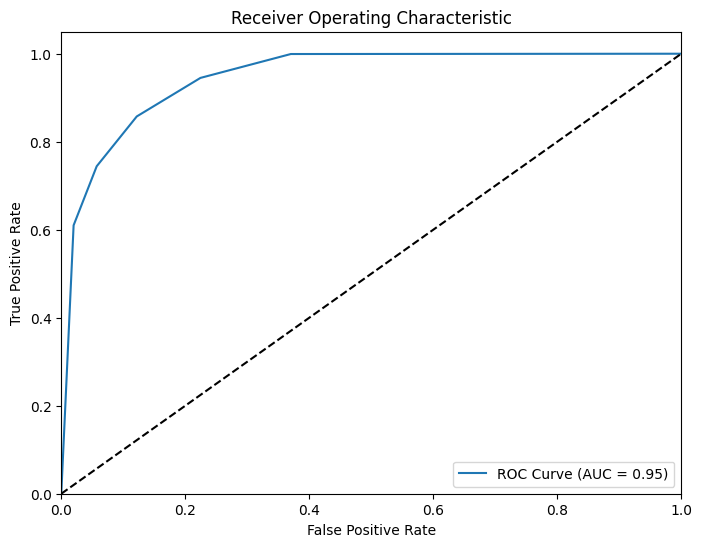

ROC Score: 0.9468706616487566


In [53]:
evaluate(model_knn)

roc_score = evaluate_roc_score(model_knn, X_test, y_test)
print('ROC Score:', roc_score)


Training Accuracy: 0.9427376059055448
Test Accuracy: 0.9457679724855297
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14982
           1       0.96      0.89      0.92      8860

    accuracy                           0.95     23842
   macro avg       0.95      0.94      0.94     23842
weighted avg       0.95      0.95      0.95     23842



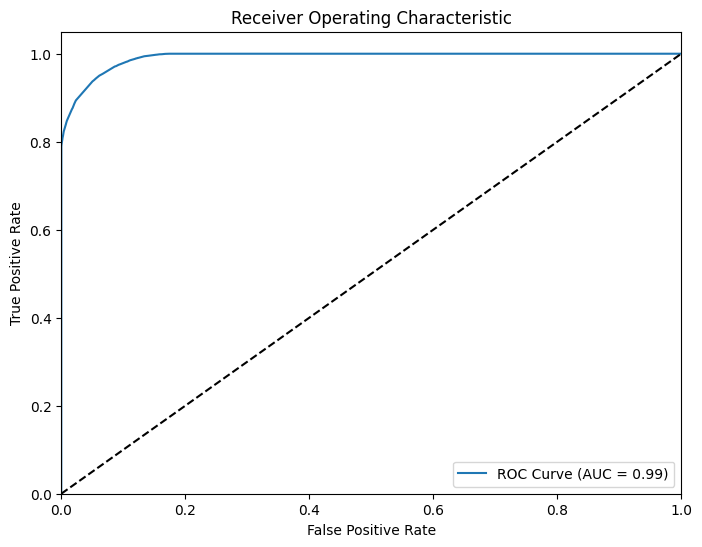

ROC Score: 0.9917833717993572


In [54]:
evaluate(model_ada)

roc_score = evaluate_roc_score(model_ada, X_test, y_test)
print('ROC Score:', roc_score)


Training Accuracy: 0.8091078768559684
Test Accuracy: 0.8082795067527891
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     14982
           1       0.81      0.63      0.71      8860

    accuracy                           0.81     23842
   macro avg       0.81      0.77      0.78     23842
weighted avg       0.81      0.81      0.80     23842



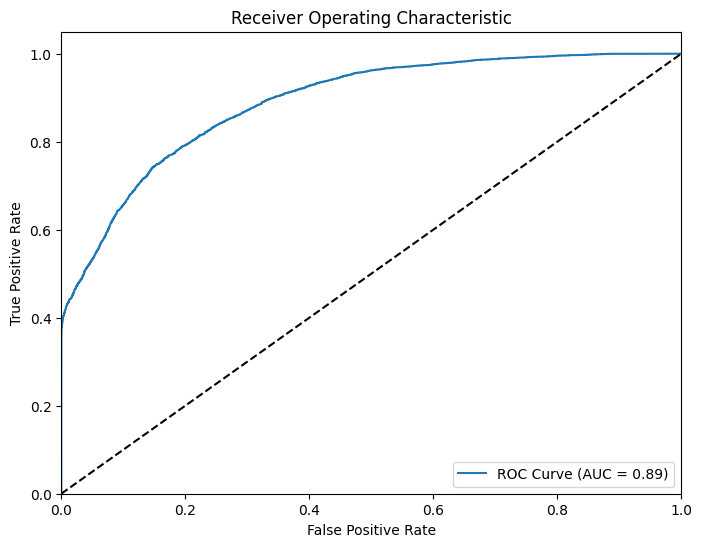

ROC Score: 0.8892664425301333


In [55]:
evaluate(model_lr)
roc_score = evaluate_roc_score(model_lr, X_test, y_test)
print('ROC Score:', roc_score)


Training Accuracy: 0.8637907893633084
Test Accuracy: 0.8641473030786008
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14982
           1       0.85      0.78      0.81      8860

    accuracy                           0.86     23842
   macro avg       0.86      0.85      0.85     23842
weighted avg       0.86      0.86      0.86     23842



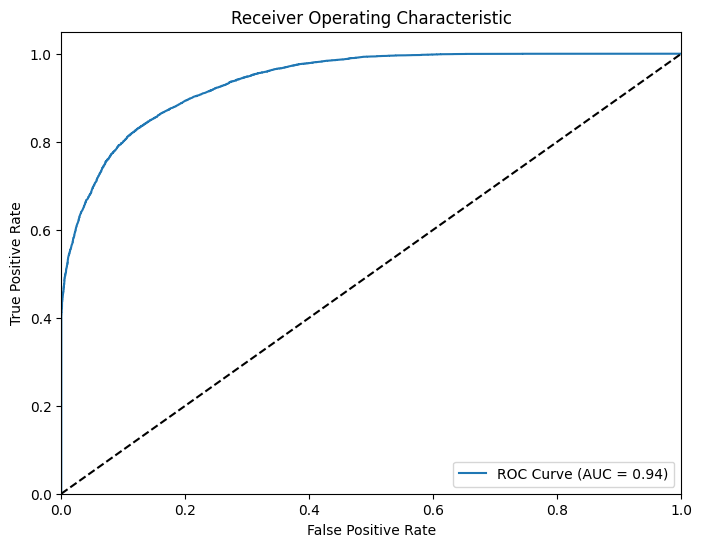

ROC Score: 0.9395244948565818


In [56]:
evaluate(model_xgb)
roc_score = evaluate_roc_score(model_xgb, X_test, y_test)
print('ROC Score:', roc_score)


Training Accuracy: 0.9427376059055448
Test Accuracy: 0.9457679724855297
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14982
           1       0.96      0.89      0.92      8860

    accuracy                           0.95     23842
   macro avg       0.95      0.94      0.94     23842
weighted avg       0.95      0.95      0.95     23842



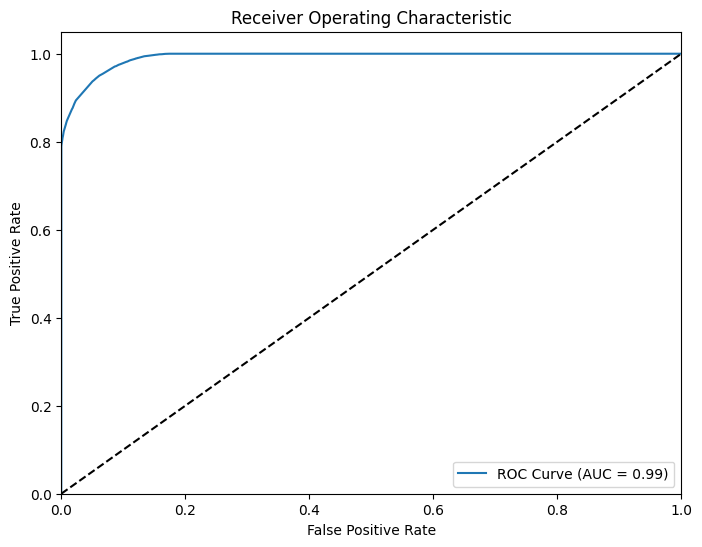

ROC Score: 0.9917833717993572


In [57]:
evaluate(model_tree)
roc_score = evaluate_roc_score(model_tree, X_test, y_test)
print('ROC Score:', roc_score)


Training Accuracy: 0.9427376059055448
Test Accuracy: 0.9457679724855297
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14982
           1       0.96      0.89      0.92      8860

    accuracy                           0.95     23842
   macro avg       0.95      0.94      0.94     23842
weighted avg       0.95      0.95      0.95     23842



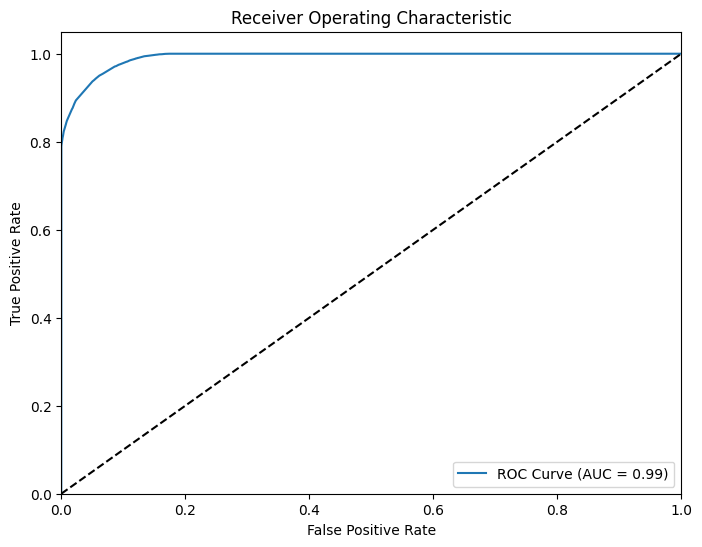

ROC Score: 0.9917833717993572


In [58]:
evaluate(model_rdf)
roc_score = evaluate_roc_score(model_rdf, X_test, y_test)
print('ROC Score:', roc_score)


Pretty confusion matrix

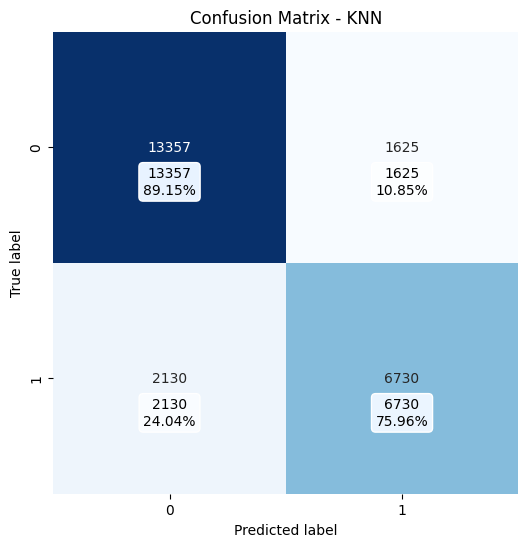

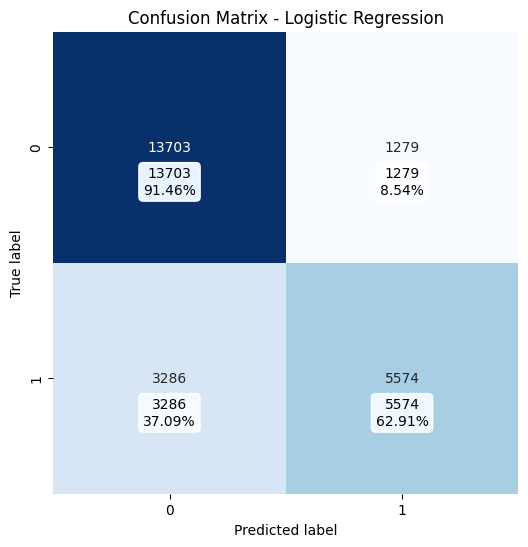

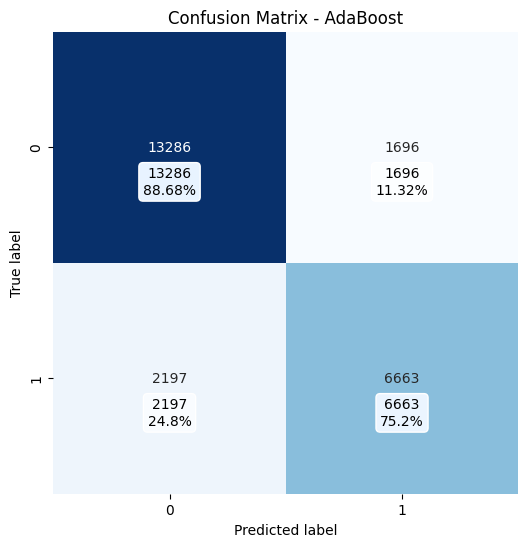

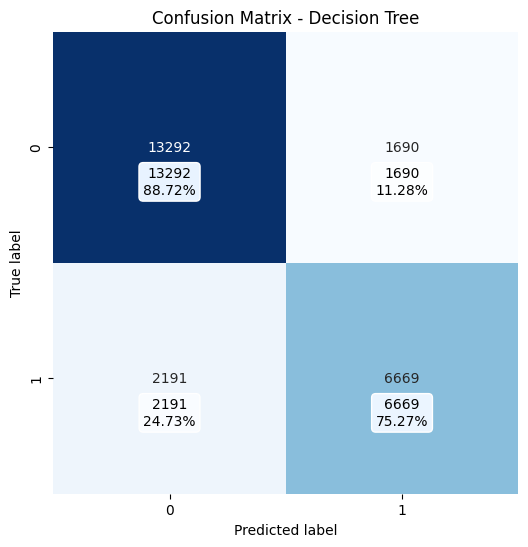

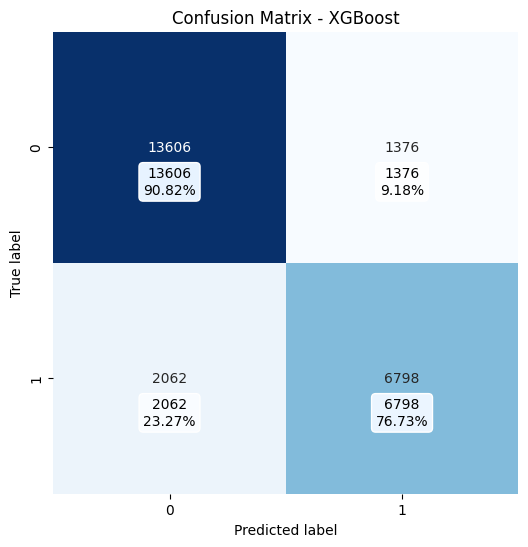

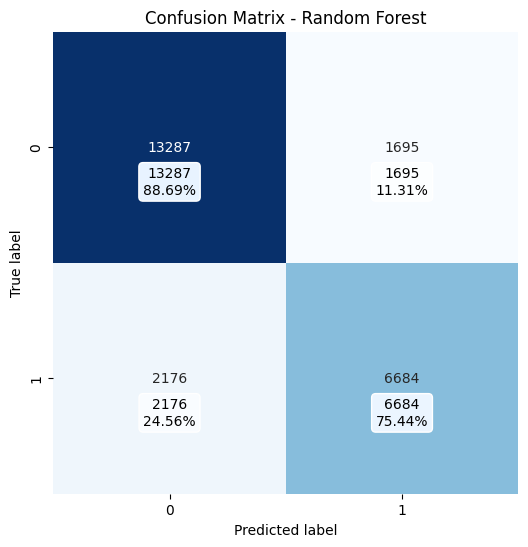

In [59]:
import matplotlib.colors as mcolors
# Assuming you have a list of models and their names
models = [model_knn, model_lr, model_ada, model_tree, model_xgb, model_rdf]
model_names = ['KNN', 'Logistic Regression', 'AdaBoost', 'Decision Tree', 'XGBoost', 'Random Forest']

# Define the colormap for background colors
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['#ffffff', '#e5f2ff'])

# Iterate through each model
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages
    percent_matrix = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    
    # Convert confusion matrix and percentages to pandas DataFrame
    cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
    percent_df = pd.DataFrame(percent_matrix, index=['0', '1'], columns=['0', '1'])
    
    # Plot confusion matrix with percentages and background colors
    plt.figure(figsize=(6, 6))
    plt.title('Confusion Matrix - {}'.format(model_name))
    sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='d', cbar=False)
    for i in range(len(cm)):
        for j in range(len(cm)):
            text = str(cm[i, j]) + '\n' + str(percent_df.values[i, j]) + '%'
            plt.text(j + 0.5, i + 0.65, text, ha='center', va='center', color='black', fontsize=10,
                     bbox=dict(facecolor=cmap(percent_df.values[i, j] / 100), edgecolor='white', boxstyle='round'))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

Hyperameters Tuning

In [60]:
def tune_hyperparameters(model, X_train, y_train, parameters):
    # Perform GridSearchCV for hyperparameter tuning
    clf = GridSearchCV(model, parameters, cv=5)
    clf.fit(X_train, y_train)# Define the models to consider
    # Print the best parameters found
    print("Best parameters for", model.__class__.__name__, ":", clf.best_params_)

    # Get the best model
    best_model = clf.best_estimator_

    return best_model

model_knn = KNeighborsClassifier()
model_ada = AdaBoostClassifier()
model_tree = DecisionTreeClassifier()
model_rdf = RandomForestClassifier()
model_xgb = XGBClassifier()

# Define the hyperparameters for each model
hyperparameters = {
    model_knn: {'n_neighbors': [3, 5, 7]},
    model_ada: {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 1, 10]},
    model_tree: {'max_depth': [3, 5, 7]},
    model_rdf: {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    model_xgb: {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
}

best_model = None
best_score = 0

# Iterate over the models and hyperparameters
for model, params in hyperparameters.items():
    # Perform hyperparameter tuning
    model = tune_hyperparameters(model, X_train, y_train, params)
    
    # Evaluate the model
    score = model.score(X_test, y_test)
    
    # Check if this model has the best score so far
    if score > best_score:
        best_model = model
        best_score = score

# Create a new instance of the best model with the best hyperparameters
best_model_with_params = best_model.__class__(**best_model.get_params())

# Print the best model and its score
print("Best model:", best_model_with_params)
print("Best score:", best_score)

Best parameters for KNeighborsClassifier : {'n_neighbors': 7}
Best parameters for AdaBoostClassifier : {'learning_rate': 1, 'n_estimators': 200}
Best parameters for DecisionTreeClassifier : {'max_depth': 7}
Best parameters for RandomForestClassifier : {'max_depth': None, 'n_estimators': 200}
Best parameters for XGBClassifier : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, m

In [61]:
#model_rdf.set_params(**{'max_depth': None, 'n_estimators': 200})

Evaluate Model

In [62]:
def evaluate_best_model(model):
    model.fit(X_train, y_train)  # Fit the model with training data
    y_pred = model.predict(X_test)
    print("Training Accuracy:", model.score(X_train, y_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True)
    print(classification_report(y_test, y_pred))
    plt.show()

Training Accuracy: 0.9462608002684338
Test Accuracy: 0.84934149819646
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     14982
           1       0.81      0.77      0.79      8860

    accuracy                           0.85     23842
   macro avg       0.84      0.83      0.84     23842
weighted avg       0.85      0.85      0.85     23842



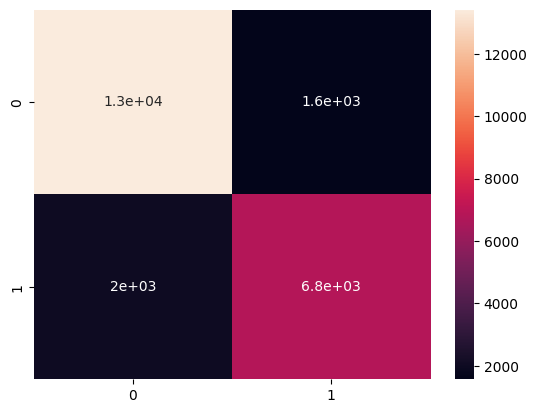

In [63]:
evaluate_best_model(model_rdf)

Training Accuracy: 0.8629309621676033
Test Accuracy: 0.8558006878617566
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14982
           1       0.83      0.77      0.80      8860

    accuracy                           0.86     23842
   macro avg       0.85      0.84      0.84     23842
weighted avg       0.85      0.86      0.85     23842



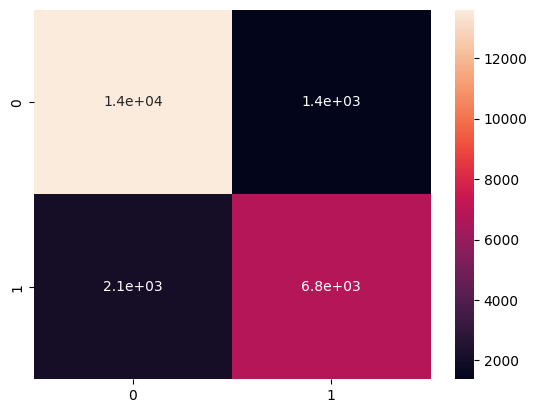

In [68]:
evaluate_best_model(model_xgb)

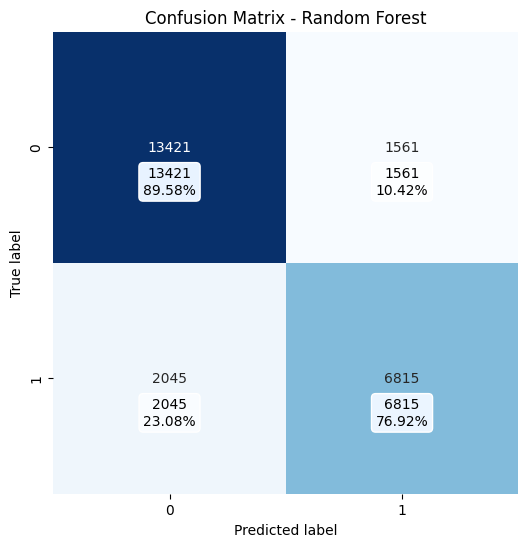

In [64]:
import matplotlib.colors as mcolors
# Assuming you have a list of models and their names
models = [ model_rdf]
model_names = ['Random Forest']

# Define the colormap for background colors
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['#ffffff', '#e5f2ff'])

# Iterate through each model
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages
    percent_matrix = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    
    # Convert confusion matrix and percentages to pandas DataFrame
    cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
    percent_df = pd.DataFrame(percent_matrix, index=['0', '1'], columns=['0', '1'])
    
    # Plot confusion matrix with percentages and background colors
    plt.figure(figsize=(6, 6))
    plt.title('Confusion Matrix - {}'.format(model_name))
    sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='d', cbar=False)
    for i in range(len(cm)):
        for j in range(len(cm)):
            text = str(cm[i, j]) + '\n' + str(percent_df.values[i, j]) + '%'
            plt.text(j + 0.5, i + 0.65, text, ha='center', va='center', color='black', fontsize=10,
                     bbox=dict(facecolor=cmap(percent_df.values[i, j] / 100), edgecolor='white', boxstyle='round'))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


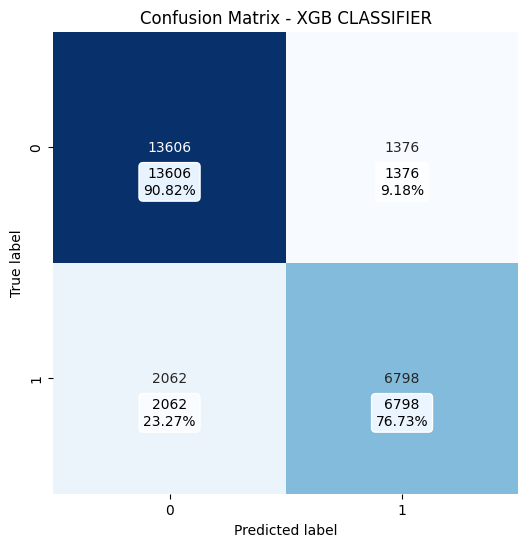

In [69]:
import matplotlib.colors as mcolors
# Assuming you have a list of models and their names
models = [ model_xgb]
model_names = ['XGB CLASSIFIER']

# Define the colormap for background colors
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['#ffffff', '#e5f2ff'])

# Iterate through each model
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages
    percent_matrix = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    
    # Convert confusion matrix and percentages to pandas DataFrame
    cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
    percent_df = pd.DataFrame(percent_matrix, index=['0', '1'], columns=['0', '1'])
    
    # Plot confusion matrix with percentages and background colors
    plt.figure(figsize=(6, 6))
    plt.title('Confusion Matrix - {}'.format(model_name))
    sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='d', cbar=False)
    for i in range(len(cm)):
        for j in range(len(cm)):
            text = str(cm[i, j]) + '\n' + str(percent_df.values[i, j]) + '%'
            plt.text(j + 0.5, i + 0.65, text, ha='center', va='center', color='black', fontsize=10,
                     bbox=dict(facecolor=cmap(percent_df.values[i, j] / 100), edgecolor='white', boxstyle='round'))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


Feature Importance

In [65]:
def plot_feature_importance(model, X_Train, model_type):
  if model_type == "RDF":
    features = X_Train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
  elif model_type == "ADABOOST":
    pass
  else:
    print("plot feature importance for XGBoost")

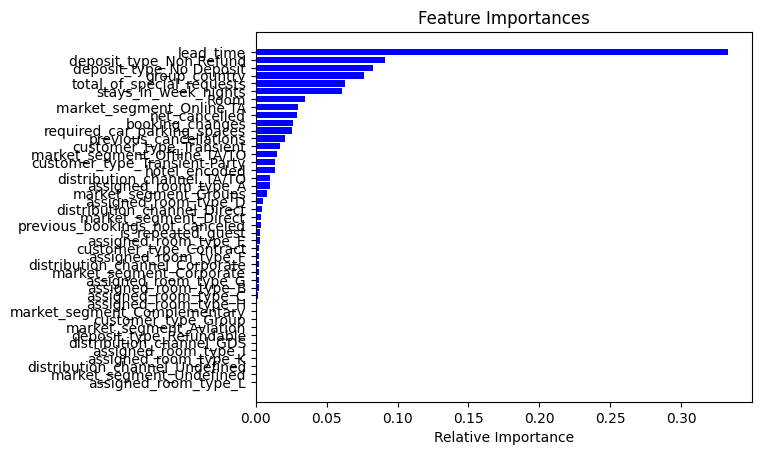

In [66]:
plot_feature_importance(model_rdf, X_train, "RDF")

In [70]:
def plot_feature_importance(model, X_Train, model_type):
  if model_type == "XGB":
    features = X_Train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
  elif model_type == "ADABOOST":
    pass
  else:
    print("plot feature importance for XGBoost")

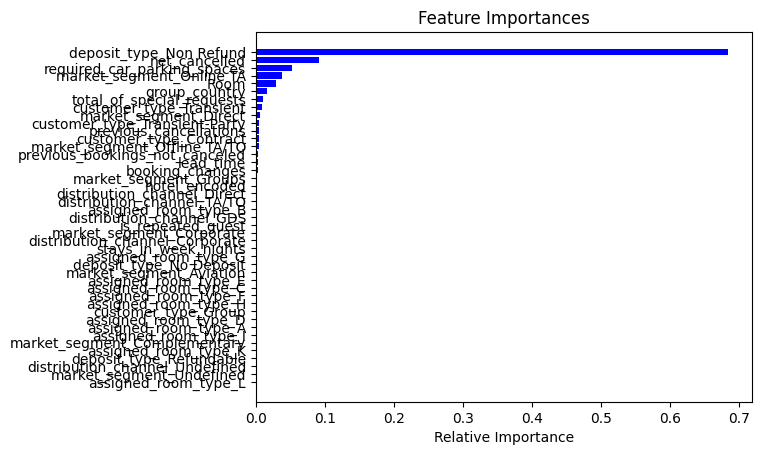

In [71]:
plot_feature_importance(model_xgb, X_train, "XGB")

ROC

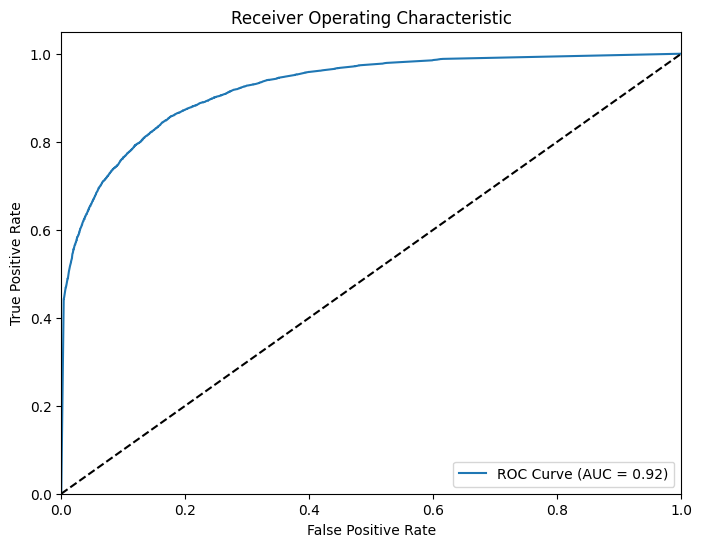

ROC Score: 0.9228055005359329


In [67]:
roc_score = evaluate_roc_score(model_rdf, X_test, y_test)
print('ROC Score:', roc_score)

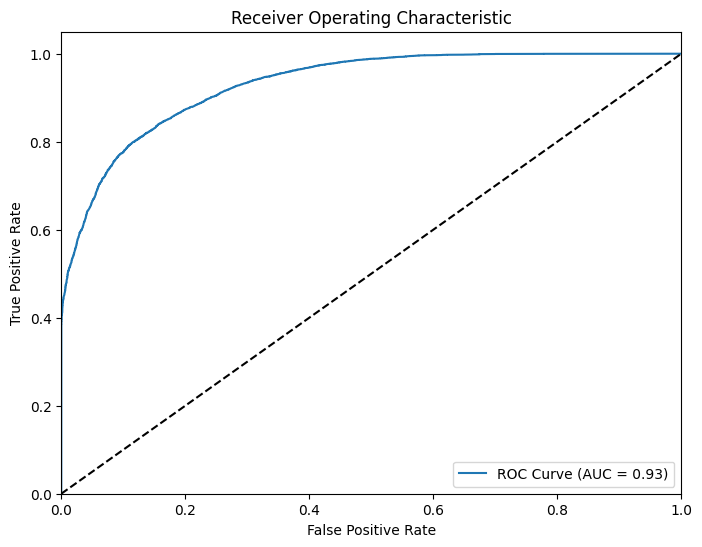

ROC Score: 0.9304282219174673


In [72]:
roc_score = evaluate_roc_score(model_xgb, X_test, y_test)
print('ROC Score:', roc_score)